In [114]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [4]:
!pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 8.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 11.5 MB/s eta 0:00:00


In [6]:
import warnings

warnings.filterwarnings("ignore")

In [7]:
# binární klasifikace

In [8]:
data = pd.read_csv("data/wine.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


Konkrétně víme následující údaje:

fixed acidity (stálá kyselost),
volatile acidity (těkavá kyselost),
citric acid (kyselina citronová),
residual sugar (zbytkový cukr),
chlorides (chloridy),
free sulfur dioxide (volný oxid siřičitý),
total sulfur dioxide (celkový oxid siřičitý),
density (hustota),
pH (pH),
sulphates (sírany),
alcohol (alkohol),
quality (kvalita).

In [12]:
data["quality"].value_counts()

good    855
bad     744
Name: quality, dtype: int64

Rozdělíme si vstupní proměnné a cílovou hodnotou



In [23]:
X = data.drop(columns=["quality"])
y = data["quality"]

In [24]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [25]:
y

0        bad
1        bad
2        bad
3       good
4        bad
        ... 
1594     bad
1595    good
1596    good
1597     bad
1598    good
Name: quality, Length: 1599, dtype: object

In [26]:
X_train, X_test, y_train, y_test = train_test_split(         # X_train, X_test, údaje o víně z trénovací, testovací
  X, y, test_size=0.3, random_state=42                       # dáme jí testovací data test_size - kolik chceme dát do testovací sady 
)                               # 30% dám na testování a 70% na trénování
                                # random state je 42 - když tu metodu pustíme 2x, tak nám ty hodnoty přerozdělí stejně

In [31]:
scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train) #napřed spočítá pro každý sloupec průměr a směrodatnou odchylku 
X_test = scaler.transform(X_test)  #transform - už nepočítá tu variabilitu 
# pro testovací a trénovací data používám stejnou směrodatnou odchylku a průměr

In [33]:
X_train

array([[ 1.69536131e-01, -1.72107140e+00,  4.59303345e-01, ...,
         1.01180685e+00,  1.22661179e+00,  5.50057013e-01],
       [ 2.44606730e+00, -4.01957443e-01,  1.84105501e+00, ...,
        -2.10687612e+00,  1.22661179e+00, -2.05174641e-01],
       [-6.47680186e-01,  3.77472102e-02, -1.28054303e-03, ...,
         4.92026353e-01,  2.97270776e-01,  5.50057013e-01],
       ...,
       [-6.47680186e-01,  4.77451864e-01, -1.07597628e+00, ...,
         1.27169710e+00, -6.90154049e-01, -8.66002338e-01],
       [-2.39072027e-01, -1.83099757e+00,  4.08127357e-01, ...,
         3.72184202e-02,  8.20025095e-01,  1.39969262e+00],
       [-1.46489650e+00, -1.33632983e+00, -5.24565306e-02, ...,
         4.92026353e-01, -6.90154049e-01,  2.91015593e+00]])

In [34]:
X_test

array([[-0.35581722,  0.14767337, -0.97362431, ..., -0.48256207,
         0.00685171, -0.77159838],
       [-0.29744462, -0.18210512, -0.51304042, ...,  0.49202635,
        -1.03865693, -0.86600234],
       [ 1.39536061,  0.75226727, -0.25716048, ..., -0.22267183,
         1.86553373, -0.48838651],
       ...,
       [-0.93954316, -0.40195744, -0.15480851, ...,  0.49202635,
        -0.34165117,  0.17244119],
       [ 1.27861542, -0.12714203,  1.892231  , ..., -1.4571505 ,
         0.00685171,  1.30528867],
       [ 0.92837985, -0.18210512, -0.15480851, ...,  0.16716354,
        -0.80632167, -0.39398255]])

In [35]:
y_train

925     good
363      bad
906      bad
426     good
1251     bad
        ... 
1130    good
1294    good
860      bad
1459    good
1126    good
Name: quality, Length: 1119, dtype: object

In [36]:
y_test

803     good
124      bad
350     good
682      bad
1326    good
        ... 
1468    good
495     good
1325    good
514     good
576      bad
Name: quality, Length: 480, dtype: object

### Trénování modelu

In [38]:
clf = KNeighborsClassifier()  # chci tu klasifikační úlohu
clf.fit(X_train, y_train) # dávám mu info o víně, ale i ty trénovací

KNeighborsClassifier()

### Vyhodnocení modelu


In [40]:
y_pred = clf.predict(X_test)

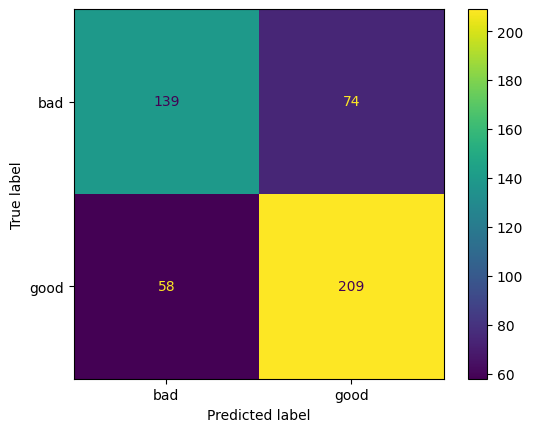

In [42]:
ConfusionMatrixDisplay.from_estimator(
    clf,   # ten náš testovací model
    X_test,  # my dáváme testovací data 
    y_test,   # výsledky
)

Existuje mnoho metrik, podle kterých můžeme měřit úspěšnost našeho modelu. Většina se dá odvodit z výsledků, které nám znázorňuje barevná matice. Každý ze čtverců si můžeme označit zkratkou a interpretovat, co znamená.

| Terminologie      | Popis | Počet |
| ----------- | ----------- | -----------: |
| True Positives (**TP**)  | Vína, která jsme správně klasifikovali jako dobrá.      | 209 |
| True Negatives (**TN**)   | Vína, která jsme správně označili jako špatná.       | 139 |
| False Positives (**FP**) | Vína, která jsme chybně označili jako dobrá, ve skutečnosti jsou špatná.        | 74 |
| False Negatives (**FN**) | Vína, která jsme chybně označili jako špatná, ve skutečnosti jsou dobrá.        | 58 |

Jak teď spočítat úspěšnost modelu? Nabízí se několik metrik:

* _Accuracy_: Poměr správně určených záznamů oproti celku.
  * $A = \frac{TP+TN}{TP+TN+FP+FN}$
* _Precision_: Tato metrika **penalizuje** označení **špatného vína za dobré**. Čím více špatných vín označíme za dobrá, tím má metrika menší hodnotu. Metrika nepočítá s tím, kolik dobrých vín jsme označili za špatná.
  * $P = \frac{TP}{TP+FP}$
* _Recall_: Tato metrika **penalizuje** označení **dobrého vína za špatné**. Čím více dobrých vín označíme za špatná, tím má metrika menší hodnotu. Metrika nepočítá s tím, kolik špatných vín jsme označili za dobrá.
  * $R = \frac{TP}{TP+FN}$
* _F1 Score_: Metrika která zohlední jak Precision, tak Recall.


In [44]:
accuracy_score(y_test, y_pred)

0.725

In [45]:
precision_score(y_test, y_pred, pos_label="good")

0.7385159010600707

In [46]:
209 / (209 + 74)

0.7385159010600707

In [47]:
recall_score(y_test, y_pred, pos_label="good")

0.7827715355805244

In [48]:
209 / (209 + 58)

0.7827715355805244

### Úprava parametrů modelu

Máme tedy nějakou základní představu o tom, jak se chová náš model. Zkusíme upravit parametr `k`, který říká, na kolik "sousedů" se podíváme, abychom rozhodli o cílové hodnotě.

In [50]:
ks = range(1, 31)  # v základu používáme knn = 5 (5 nějbližších sousedů)
# ale teď používáme k sousedů
accuracy_scores = []

for k in ks:
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train) #načti si to do paměti
    y_pred = clf.predict(X_test) #udělej predikci
    accuracy_scores.append(accuracy_score(y_test, y_pred)) #načti si to do paměti

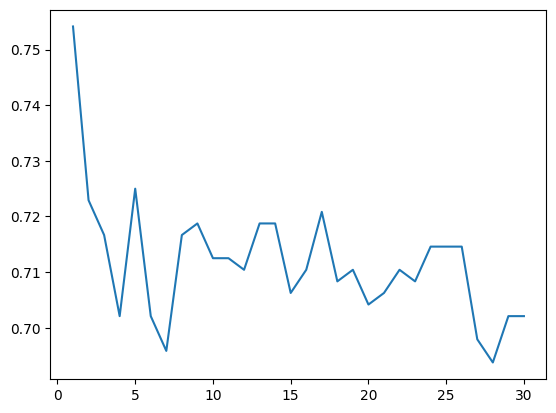

In [52]:
plt.plot(ks, accuracy_scores)

### Závěrečná predikce
Nyní provedeme finální predikci

In [53]:
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.7541666666666667

In [54]:
data_test = pd.DataFrame(X_test, columns=X.columns)
data_test["quality_prediction"] = y_pred
data_test["quality_actual"] = y_test.reset_index(drop=True)
data_test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_prediction,quality_actual
0,-0.355817,0.147673,-0.973624,-0.033846,0.557887,-0.187023,-0.029268,0.175052,-0.482562,0.006852,-0.771598,bad,good
1,-0.297445,-0.182105,-0.513040,-0.664499,-0.121204,0.494668,1.666575,-0.422949,0.492026,-1.038657,-0.866002,bad,bad
2,1.395361,0.752267,-0.257160,0.106299,0.409335,0.105130,-0.392663,1.969054,-0.222672,1.865534,-0.488387,good,good
3,0.111164,-0.401957,0.203423,-0.209028,-0.206090,1.565897,0.334127,0.664325,0.102191,-0.690154,-0.582790,bad,bad
4,-0.939543,-0.401957,-0.154809,-0.594427,-0.227312,0.202514,-0.392663,-1.075313,0.492026,-0.341651,0.172441,good,good


In [55]:
def compare_values(row):
    if row["quality_prediction"] == row["quality_actual"]:
        return "correct"
    else:
        return "incorrect"


data_test["result"] = data_test.apply(compare_values, axis=1)
data_test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_prediction,quality_actual,result
0,-0.355817,0.147673,-0.973624,-0.033846,0.557887,-0.187023,-0.029268,0.175052,-0.482562,0.006852,-0.771598,bad,good,incorrect
1,-0.297445,-0.182105,-0.513040,-0.664499,-0.121204,0.494668,1.666575,-0.422949,0.492026,-1.038657,-0.866002,bad,bad,correct
2,1.395361,0.752267,-0.257160,0.106299,0.409335,0.105130,-0.392663,1.969054,-0.222672,1.865534,-0.488387,good,good,correct
3,0.111164,-0.401957,0.203423,-0.209028,-0.206090,1.565897,0.334127,0.664325,0.102191,-0.690154,-0.582790,bad,bad,correct
4,-0.939543,-0.401957,-0.154809,-0.594427,-0.227312,0.202514,-0.392663,-1.075313,0.492026,-0.341651,0.172441,good,good,correct


In [56]:
data_test_incorrect = data_test[data_test["result"] == "incorrect"]
data_test_incorrect.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_prediction,quality_actual,result
0,-0.355817,0.147673,-0.973624,-0.033846,0.557887,-0.187023,-0.029268,0.175052,-0.482562,0.006852,-0.771598,bad,good,incorrect
8,-0.063954,-0.786699,0.561655,-0.734572,-0.630522,-0.576561,-0.544078,-0.314221,-0.352617,0.471522,-0.582790,good,bad,incorrect
11,-0.939543,1.246935,-1.280680,-0.524354,-0.206090,-0.966099,-1.058887,-0.422949,1.531587,-0.167400,-0.441185,good,bad,incorrect
12,-0.939543,-0.292031,-0.973624,-0.314137,-0.503192,0.202514,-0.392663,-0.683894,0.102191,-0.109316,-0.677194,good,bad,incorrect
14,-0.297445,-1.061514,0.510479,-0.384209,-0.121204,0.786821,0.334127,-0.205494,0.167164,-0.399735,-0.960406,bad,good,incorrect


In [58]:
data = pd.read_csv("data/nba_logreg.csv")

In [59]:
data.head()

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


In [60]:
data.columns

Index(['Name', 'GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3P Made', '3PA',
       '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK',
       'TOV', 'TARGET_5Yrs'],
      dtype='object')

In [66]:
# načtení dat 
X = data.drop(columns=["TARGET_5Yrs","Name"])
y = data["TARGET_5Yrs"]

In [67]:
# rozdělení na trénovací a testovací 
X_train, X_test, y_train, y_test = train_test_split(         # X_train, X_test, údaje o víně z trénovací, testovací
  X, y, test_size=0.3, random_state=42                       # dáme jí testovací data test_size - kolik chceme dát do testovací sady 
) 

In [68]:
# normalizace dat, musím vyhodit i ta jména
scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train) #napřed spočítá pro každý sloupec průměr a směrodatnou odchylku 
X_test = scaler.transform(X_test)  #transform - už nepočítá tu variabilitu 
# pro testovací a trénovací data používám stejnou směrodatnou odchylku a průměr

In [69]:
# trénování modelu
clf = KNeighborsClassifier()  # chci tu klasifikační úlohu
clf.fit(X_train, y_train) # dávám mu info o víně, ale i ty trénovací

KNeighborsClassifier()

In [70]:
# vyhodnocení modelu
y_pred = clf.predict(X_test)

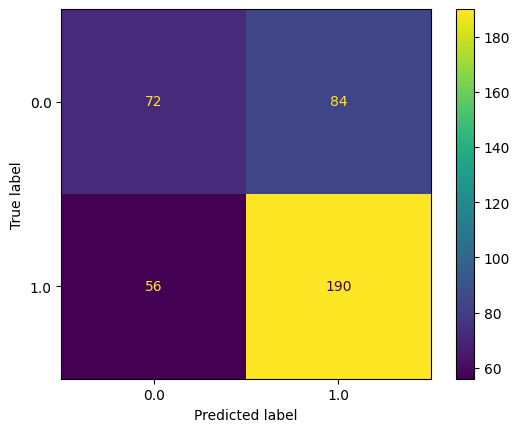

In [71]:
ConfusionMatrixDisplay.from_estimator(
    clf,   # ten náš testovací model
    X_test,  # my dáváme testovací data 
    y_test,   # výsledky
)

In [86]:
precision_score(y_test, y_pred, pos_label=1.0)

0.6934306569343066

In [72]:
190/(190+84)

0.6934306569343066

In [85]:
recall_score(y_test, y_pred, pos_label=1.0)

0.7723577235772358

In [80]:
209/(209+56)

0.7886792452830189

In [92]:
ks = range(1, 31, 2)  # v základu používáme knn = 5 (5 nějbližších sousedů)
# ale teď používáme k sousedů
accuracy_scores = []

for k in ks:
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train) #načti si to do paměti
    y_pred = clf.predict(X_test) #udělej predikci
    accuracy_scores.append(recall_score(y_test, y_pred)) #načti si to do paměti

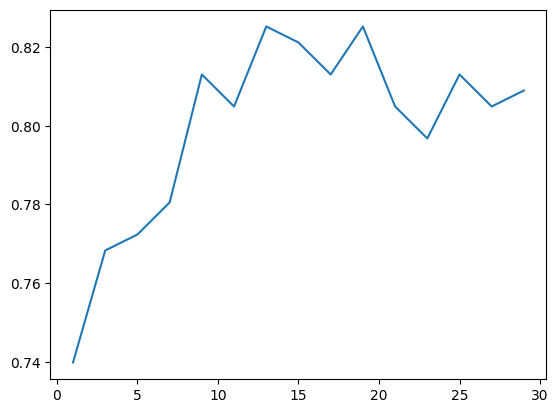

In [93]:
plt.plot(ks, accuracy_scores)

In [96]:
pd.DataFrame([ks,accuracy_scores]).T  #transpozice tabulky na 

,0,1
0,1.0,0.739837
1,3.0,0.768293
2,5.0,0.772358
3,7.0,0.780488
4,9.0,0.813008
5,11.0,0.804878
6,13.0,0.825203
7,15.0,0.821138
8,17.0,0.813008
9,19.0,0.825203



## Bonus

Vrať se k experimentu z lekce, který se zabýval kvalitou vína. Tentokrát vyber hodnotu parametru `n_neighbors` na základě metriky `precision`.

Nejprve se zamysli nad tím, co by nás k tomu vedlo. Která z těchto možností je správná?

1. Je lepší na základě modelu nekoupit dobré víno, než koupit špatné víno a to pak vyhodit.
1. Je lepší koupit omylem špatné víno a to pak vyhodit, než promeškat nákup dobrého víno.

Na základě grafu vyber tu hodnotu parametru, která dává nejlepší výsledek (nejvyšší hodnotu při volání `precision_score()`). Liší se tvůj zvolený parametr od parametru, který jsme jako závěrečný zvolili v lekci? 


Dále vytvoř graf, který bude pro několik parametrů `n_neighbors` obsahovat všechny čtyři výsledné metriky, které jsme si v kurzu ukázali: `accuracy_score`, `precision_score`, `recall_score`, `f1_score`. 

Řešení příkladu je [zde](reseni.ipynb).



In [97]:
data = pd.read_csv("data/wine.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


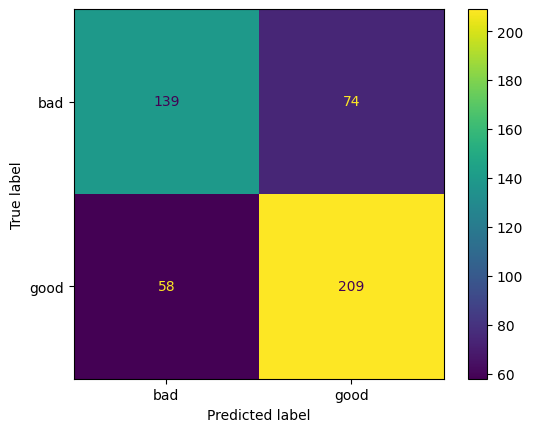

In [110]:
X = data.drop(columns=["quality"])
y = data["quality"]

X_train, X_test, y_train, y_test = train_test_split(         # X_train, X_test, údaje o víně z trénovací, testovací
  X, y, test_size=0.3, random_state=42                       # dáme jí testovací data test_size - kolik chceme dát do testovací sady 
)                             
scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train) #napřed spočítá pro každý sloupec průměr a směrodatnou odchylku 
X_test = scaler.transform(X_test)

clf = KNeighborsClassifier()  # chci tu klasifikační úlohu
clf.fit(X_train, y_train) # dávám mu info o víně, ale i ty trénovací

y_pred = clf.predict(X_test)

ConfusionMatrixDisplay.from_estimator(
    clf,   # ten náš testovací model
    X_test,  # my dáváme testovací data 
    y_test,   # výsledky
)


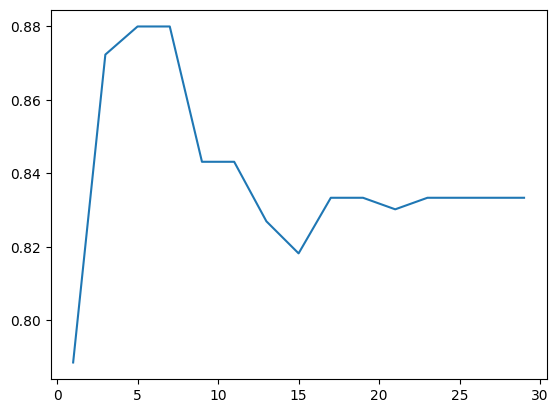

In [155]:
#Je lepší na základě modelu nekoupit dobré víno, než koupit špatné víno a to pak vyhodit.


# Tato metrika penalizuje označení špatného vína za dobré.
# Kdežto Accuracy určuje poměr správně určených záznamů oproti celku.

ks = range(1, 31, 2)  # v základu používáme knn = 5 (5 nějbližších sousedů)
# ale teď používáme k sousedů
precision_scores = []

for k in ks:
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train) #načti si to do paměti
    y_pred = clf.predict(X_test) #udělej predikci
    precision_scores.append(precision_score(y_test, y_pred)) #načti si to do paměti
plt.plot(ks, precision_scores)

In [156]:
ks = range(1, 31, 2)
precision_scores = []

for k in ks:
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    precision_scores.append(precision_score(y_test, y_pred, pos_label="good"))
plt.plot(ks, precision_scores)


ValueError: pos_label=good is not a valid label. It should be one of [0, 1]

In [157]:
accuracy_scores = []
recall_scores = []
f1_scores = []

for k in ks:
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred, pos_label="good"))
    f1_scores.append(f1_score(y_test, y_pred, pos_label="good"))
plt.plot(ks, recall_scores, label="recall")
plt.plot(ks, precision_scores, label="precision")
plt.plot(ks, accuracy_scores, label="accuracy")
plt.plot(ks, f1_scores, label="f1")
plt.legend()

ValueError: pos_label=good is not a valid label. It should be one of [0, 1]

In [159]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score

data = pd.read_csv("data/heart.csv")
data.head()
X = data.drop(columns=["output"])
y = data["output"]

In [160]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [161]:
X.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [162]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 303, dtype: int64

In [194]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state = 42
)
scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train) #napřed spočítá pro každý sloupec průměr a směrodatnou odchylku 
X_test = scaler.transform(X_test)

clf = KNeighborsClassifier()  # chci tu klasifikační úlohu
clf.fit(X_train, y_train) # dávám mu info o víně, ale i ty trénovací


KNeighborsClassifier()

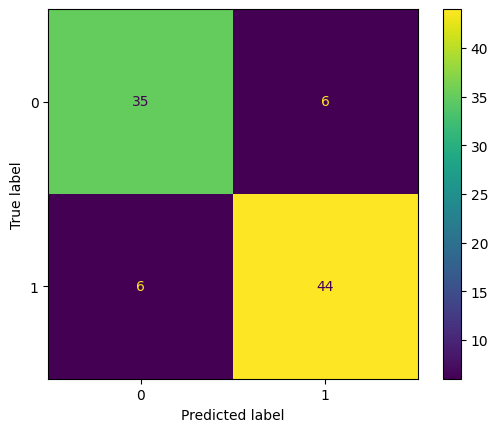

In [195]:
y_pred = clf.predict(X_test)

ConfusionMatrixDisplay.from_estimator(
    clf,   # ten náš testovací model
    X_test,  # my dáváme testovací data 
    y_test,   # výsledky
)

In [196]:
accuracy_score(y_test, y_pred)

0.8681318681318682

In [197]:
precision_score(y_test, y_pred)

0.88

In [198]:
44/(44+6)

0.88

In [199]:
recall_score(y_test, y_pred)

0.88

In [200]:
44/(44+6)

0.88

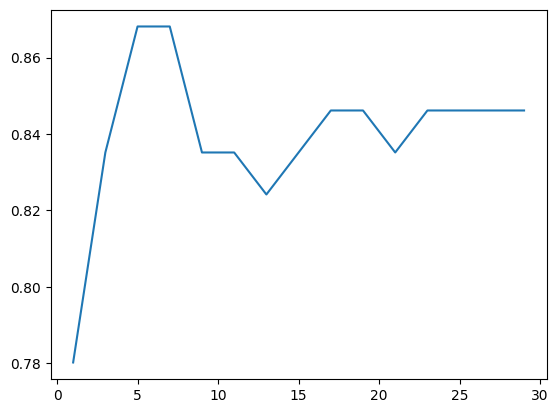

In [201]:
ks = range(1, 31, 2)  # v základu používáme knn = 5 (5 nějbližších sousedů)
# ale teď používáme k sousedů
accuracy_scores = []

for k in ks:
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train) #načti si to do paměti
    y_pred = clf.predict(X_test) #udělej predikci
    accuracy_scores.append(accuracy_score(y_test, y_pred)) #načti si to do paměti
plt.plot(ks, accuracy_scores)

In [203]:
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.8681318681318682

In [204]:
clf = KNeighborsClassifier(n_neighbors=6)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.8351648351648352

In [206]:
clf = KNeighborsClassifier(n_neighbors=7)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.8681318681318682